# Project: Wrangle and Analyze data
## Table of Contents

- Introduction
- Data Gathering
- Data Assessing
- Data Cleaning
- Data Storing
- Data Analysis
- Insights




Introduction

Goal: As a part of Udacity's Data Ananlyst Nanodegree program, I was given a project to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

Data

- The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced."

- Image Predictions file a table with image predictions (the top three only) using neural networks alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- JSON file with tweets includes retweet count and favorite count was accessed from Udacity as JSON data in a file called tweet_json.txt file.

## Gather

In the gathering part I proceeded with uploading The WeRateDogs Twitter archive, downloading Image Predictions and tweet_json.txt file.

In [397]:
#Let's import nessecary packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [398]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', allow_redirects= True)
with open ('et_the_image-predictions.tsv', mode = 'wb')as file:
    file.write(r.content)

In [399]:
#Download the all the nessecary three files
images = pd.read_csv('et_the_image-predictions.tsv', sep='\t')
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

## Assess

Here let's asses each of our dataframes for quality and tidiness issues through visual and programatic approaches. 

Should be noted:
- Only tweets with original ratings with images should be considereed,  no retweets.
- The analysis requires at least eight (8) quality issues and two (2) tidiness issues.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

#### Let's take a closer look to each dataframe and lets start with `twitter_arch` table

In [400]:
twitter_arch.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [401]:
twitter_arch.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [402]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [403]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [404]:
# Checking NULL values
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [405]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Cases with numerator < 10

In [406]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

23 values where rating denominator != 10 

In [407]:
twitter_arch.name.value_counts().head(40)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
an           7
Buddy        7
Daisy        7
Bailey       7
Toby         7
Jack         6
Jax          6
Scout        6
Dave         6
Rusty        6
Leo          6
Oscar        6
Stanley      6
Koda         6
Bella        6
Milo         6
Larry        5
Phil         5
Chester      5
Bentley      5
Oakley       5
Sunny        5
George       5
Louis        5
Alfie        5
Sammy        5
Finn         5
Name: name, dtype: int64

There are 745 entries with None 

In [408]:
#List of names that are not capitalized 
not_cap_names_mask = twitter_arch.name.str.contains('^[a-z]', regex = True)
twitter_arch[not_cap_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [409]:
len (twitter_arch [not_cap_names_mask])

109

There are 109 cases of names that do not look like dog names.

#### Summary of assesment `twitter_arch` table: 

#### Quality issue: 
- Tweet_id is in integer format but should be string. 
- The timestamp column is object but need to be converted to datetime format
- Replace None values in names column 
- Replace the values that are not real names in the "name" column such as 'a', 'such', 'the', 'just', 'getting' etc. 

#### Tidiness issue:
- Convert Nones and np.NaN to empty string '' for 4 columns (doggo, pupper, fluffer, puppo) and store these values under one dog stages column. 
- Missing records in mutiple columns and after analyzing their content it was found that we won't be using it in our data analysis thus I decided to drop columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp' 

#### Lets take a closer look to the `images` table

In [410]:
#lets take a look at images dataframe
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [411]:
#lets take a look at images dataframe
images.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [412]:
#lets take a look at images dataframe
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [413]:
#lets take a look at images dataframe
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [414]:
# Checking NULL values
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [415]:
images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [416]:
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [417]:
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [418]:
#Find out how many variables do not predict dogs
images[~images.p1_dog & \
               ~images.p2_dog & \
               ~images.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


In [419]:
sum(~images.p1_dog & \
    ~images.p2_dog & \
    ~images.p3_dog)

324

There are 324 entries that do not predict dog breeds.

#### Let's asses the table `tweet_json_df`

In [420]:
tweet_json_df.head(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [421]:
tweet_json_df.tail(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2344,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",115,False,Here is the Rand Paul of retrievers folks! He'...,NaN,...,0.0,NaN,NaN,NaN,61,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2345,NaN,NaN,2015-11-16 00:55:59,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...",304,False,My oh my. This is a rare blond Canadian terrie...,NaN,...,0.0,NaN,NaN,NaN,146,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2346,NaN,NaN,2015-11-16 00:49:46,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...",448,False,Here is a Siberian heavily armored polar bear ...,NaN,...,0.0,NaN,NaN,NaN,261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2347,NaN,NaN,2015-11-16 00:35:11,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...",1253,False,This is an odd dog. Hard on the outside but lo...,NaN,...,0.0,NaN,NaN,NaN,879,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2348,NaN,NaN,2015-11-16 00:30:50,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...",136,False,This is a truly beautiful English Wilson Staff...,NaN,...,0.0,NaN,NaN,NaN,60,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [422]:
tweet_json_df.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2294,NaN,NaN,2015-11-18 21:23:57,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667090887587966977, 'id_str'...",349,False,This is Clybe. He is an Anemone Valdez. One ea...,NaN,...,0.0,NaN,NaN,NaN,132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [423]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [424]:
tweet_json_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


#### Summary of assesment `images` table : 

#### Quality issue: 
- tweet_id is in integer format but should be string.
- We will take into consideration that the twitter_archive dataframe has 2356 entries while in image prediction table we have 2075, so there are 281 missing values. 
- Out of 2075 predictions, 324 are not dog breeds. (hamster, bookcase and etc)

#### Tidiness issue:
- The dog breed prediction with the highest confidence level p1 will be kept while other predictions will be dropped.


#### Summary of assesment  `tweet_json_df` table : 

#### Quality
- id is in integer format but should be string. 
- Rename id column in tweet_json_df_clean table to 'tweet_id'


#### Tidiness
- - Missing values in multiple columns. Drop these columns as they won't be used in our data analysis: 'contributors', 'coordinates', 'extended_entities', 'geo','in_reply_to_screen_name','in_reply_to_status_id', and etc.
- JSON file need to be combined with the Twitter archive

# Data Cleaning 

In [425]:
#Let's create copy of each dataframe before we proceed with cleaning 
images_clean = images.copy()
tweet_json_df_clean = tweet_json_df.copy()
twitter_arch_clean = twitter_arch.copy()

### Twitter archive data 

### Quality issues 

####  1. Timestamp is in string format 

####   Define: Convert timestamp to datetime data type



In [426]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

In [427]:
#Datatime format is appplied 
twitter_arch_clean.timestamp.sample(5)

299    2017-03-01 17:22:13
34     2017-07-13 15:58:47
985    2016-07-02 03:00:36
1566   2016-01-15 03:39:15
1720   2015-12-24 22:00:10
Name: timestamp, dtype: datetime64[ns]

#### 2. Rating nominator  with  < 10
#### Define: Remove where rating numerator < 10

In [428]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.rating_numerator < 10].index, inplace = True)

In [429]:
twitter_arch_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
14       54
420       2
15        2
75        2
50        1
17        1
20        1
24        1
26        1
27        1
44        1
45        1
1776      1
960       1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
666       1
60        1
Name: rating_numerator, dtype: int64

#### 3. Rating nominator  with  >> 10
#### Define: Drop rating numerator >> 10 

In [430]:
# Delete the following: rating numerator = 420, 75, 1776, 666, 182, 27, 26, 17
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==420].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==75].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==1776].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==666].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==182].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==27].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==26].index, inplace=True)
twitter_arch_clean.drop(twitter_arch_clean.loc[twitter_arch_clean['rating_numerator']==17].index, inplace=True)


In [431]:
twitter_arch_clean.rating_numerator.value_counts()

12     558
11     464
10     461
13     351
14      54
15       2
204      1
20       1
24       1
44       1
45       1
960      1
60       1
80       1
84       1
88       1
99       1
121      1
143      1
144      1
165      1
50       1
Name: rating_numerator, dtype: int64

#### 4. Rating denominator != 10
#### Define: Drop rating denominator !=10

In [432]:
twitter_arch_clean.drop(twitter_arch_clean[twitter_arch_clean.rating_denominator != 10].index, inplace= True)

In [433]:
twitter_arch_clean.rating_denominator.value_counts()

10    1889
Name: rating_denominator, dtype: int64

#### 5. None values in names column 
#### Define: Replace None values in names column in twitter_arch_clean table 

In [434]:
twitter_arch_clean.name.replace('None', '', inplace=True)
twitter_arch_clean.name.replace(np.NaN, '', inplace=True)

In [435]:
twitter_arch_clean.name.value_counts()

              582
a              29
Charlie        12
Cooper         10
Lucy           10
Oliver         10
Tucker          9
Bo              9
Winston         8
Lola            8
Penny           8
Sadie           7
Jack            6
Koda            6
Bailey          6
Milo            6
Daisy           6
Leo             6
Sunny           5
Scout           5
Louis           5
the             5
Oakley          5
Rusty           5
Dave            5
Oscar           5
Sammy           5
Buddy           5
Toby            5
Stanley         5
             ... 
Flash           1
Cedrick         1
Sobe            1
Rinna           1
Andru           1
Millie          1
Maude           1
Meera           1
Nico            1
Beemo           1
Jennifur        1
Divine          1
Jerome          1
Frank           1
Lambeau         1
Zuzu            1
Willy           1
Brandonald      1
Hero            1
Kuyu            1
Chesney         1
Rascal          1
Corey           1
Tripp           1
Grizzie   

#### 6. Not real names in names column
#### Define  Replace the values that are not real names in the "name" column such as 'a', 'such', 'the', 'just', 'getting' etc. 

In [436]:
#Code
mask = twitter_arch_clean.name.str.islower()
column_name = 'name'
twitter_arch_clean.loc[mask, column_name] = np.nan

In [437]:
#Test
twitter_arch_clean.name.value_counts()

            582
Charlie      12
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Bo            9
Winston       8
Lola          8
Penny         8
Sadie         7
Leo           6
Bailey        6
Koda          6
Milo          6
Jack          6
Daisy         6
Oscar         5
Rusty         5
Louis         5
Toby          5
Dave          5
Scout         5
Finn          5
Sammy         5
Oakley        5
Jax           5
Buddy         5
Bentley       5
Stanley       5
           ... 
Bruno         1
Karma         1
Rumpole       1
Harvey        1
Dudley        1
Pippin        1
Liam          1
Tedders       1
Tug           1
Chloe         1
Brandi        1
Strudel       1
Zeus          1
Amy           1
Maisey        1
Lilah         1
Amber         1
Callie        1
Mollie        1
Brutus        1
Sundance      1
Akumi         1
Raphael       1
Ike           1
Jarvis        1
Ulysses       1
Jomathan      1
Torque        1
Wiggles       1
Stefan        1
Name: name, Length: 791,

#### 7. Tweet_id is in integer format
#### Define: Change it to string.

In [438]:
#Code
twitter_arch_clean['tweet_id'] = twitter_arch_clean.tweet_id.astype(str)

In [439]:
#Test
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1889 non-null object
in_reply_to_status_id         58 non-null float64
in_reply_to_user_id           58 non-null float64
timestamp                     1889 non-null datetime64[ns]
source                        1889 non-null object
text                          1889 non-null object
retweeted_status_id           171 non-null float64
retweeted_status_user_id      171 non-null float64
retweeted_status_timestamp    171 non-null object
expanded_urls                 1847 non-null object
rating_numerator              1889 non-null int64
rating_denominator            1889 non-null int64
name                          1819 non-null object
doggo                         1889 non-null object
floofer                       1889 non-null object
pupper                        1889 non-null object
puppo                         1889 non-null object
dtypes: datetime64[ns](

### Tidiness issue 
#### 1. The mutiple columns that have missing values, and that will not be used in data analysis in this project.  
#### Define: Drop the columns 

In [440]:
#Code
twitter_arch_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [441]:
#Test
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 2350
Data columns (total 11 columns):
tweet_id              1889 non-null object
timestamp             1889 non-null datetime64[ns]
source                1889 non-null object
text                  1889 non-null object
rating_numerator      1889 non-null int64
rating_denominator    1889 non-null int64
name                  1819 non-null object
doggo                 1889 non-null object
floofer               1889 non-null object
pupper                1889 non-null object
puppo                 1889 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 177.1+ KB


#### 2. Dog stages in multiple columns and it clashes with the standarts of "tidy data"
#### Define: First convert Nones and np.NaN to empty string '' for Dog stage columns that are split up into 4 columns such as doggo, floofer, pupper, puppo stored in one column called `dog_stages` 


In [442]:
#Code
twitter_arch_clean.doggo.replace('None', '', inplace=True)
twitter_arch_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_arch_clean.floofer.replace('None', '', inplace=True)
twitter_arch_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_arch_clean.pupper.replace('None', '', inplace=True)
twitter_arch_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_arch_clean.puppo.replace('None', '', inplace=True)
twitter_arch_clean.puppo.replace(np.NaN, '', inplace=True)

In [443]:
twitter_arch_clean['dog_stages'] = twitter_arch_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [444]:
twitter_arch_clean['dog_stages'] = twitter_arch_clean.doggo + twitter_arch_clean.floofer + twitter_arch_clean.pupper + twitter_arch_clean.puppo
twitter_arch_clean.loc[twitter_arch_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
twitter_arch_clean.loc[twitter_arch_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
twitter_arch_clean.loc[twitter_arch_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [445]:
#drop the 4 columns 
twitter_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [446]:
#Test if all the dog stages stored in dog_stages column 
twitter_arch_clean.dog_stages.value_counts()

                  1558
pupper             202
doggo               79
puppo               28
doggo, pupper       11
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [447]:
#Test2
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 2350
Data columns (total 8 columns):
tweet_id              1889 non-null object
timestamp             1889 non-null datetime64[ns]
source                1889 non-null object
text                  1889 non-null object
rating_numerator      1889 non-null int64
rating_denominator    1889 non-null int64
name                  1819 non-null object
dog_stages            1889 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 132.8+ KB


### `images_clean` table 

#### 1.  Tweet_id is in integer format
#### Define: it should be string format

In [448]:
#Tweet_id is in integer format, they should be string.
images_clean['tweet_id'] = images_clean.tweet_id.astype(str)
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness issue:
#### The dog breed prediction with the highest confidence level p1 will be kept while other predictions will be dropped.
#### Define: Rename p1 and p1_conf columns and drop 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf'

In [449]:
# Code
new_col = {'p1':'breed_predict', 'p1_conf':'predict_confidence'}
images_clean.rename(columns= new_col, inplace=True)

In [450]:
# Test
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
breed_predict         2075 non-null object
predict_confidence    2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [451]:
# Code
drop_colum = ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']
images_clean.drop(drop_colum, inplace=True, axis=1)

In [452]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
breed_predict         2075 non-null object
predict_confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


### `tweet_json_df_clean` table 

#### 1.  id is in integer format
#### Define: it should be string format

In [453]:
#id is in integer format, they should be string.
tweet_json_df_clean['id'] = tweet_json_df_clean.id.astype(str)
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

### Tidiness issue
#### 1. Multiple columns that have missing values and values that will not be used in our data anlalysis.
#### Define: Drop columns in `tweet_json_df` table 

In [454]:
tweet_json_df_clean.drop(columns = ['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities', 'favorited', 'full_text','geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status','lang','place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status', 'source', 'user'], inplace=True)

In [455]:
#Test
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
truncated         2354 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 57.5+ KB


#### 2. The id column has the same values as the 'tweet_id' in images and twitter_arch tables. In order to avoid errors while merging all dataframes, we need to adress this ussues beforehand. 
#### Define: Rename ID column in tweet_json_df_clean table to 'tweet_id' 


In [456]:
#rename id column in tweet_json_df_clean table to 'tweet_id' and proceed with merge
tweet_json_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [457]:
#Test
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
truncated         2354 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 57.5+ KB


# Data storing:
## Merge all cleaned dataframes to create a master dataset

#### Merge twitter_arch_clean, images_clean, tweet_json_df_clean tables 

In [458]:
#first merge two tabels and save it as a new table `df_clean_merged_1`
df_clean_merged_1 = pd.merge(twitter_arch_clean, images_clean, on='tweet_id', how='inner')
df_clean_merged_1

# With the new merged dataframes, lets merge the `tweet_json_df_clean` using pandas merge function using join on tweet_id
df_master = pd.merge(tweet_json_df_clean,df_clean_merged_1, on='tweet_id', how='inner')
df_master.head()

,favorite_count,tweet_id,retweet_count,truncated,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed_predict,predict_confidence
0,39467,892420643555336193,8853,False,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,33819,892177421306343426,6514,False,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,25461,891815181378084864,4328,False,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,42908,891689557279858688,8964,False,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,41048,891327558926688256,9774,False,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [459]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 1638
Data columns (total 15 columns):
favorite_count        1639 non-null int64
tweet_id              1639 non-null object
retweet_count         1639 non-null int64
truncated             1639 non-null bool
timestamp             1639 non-null datetime64[ns]
source                1639 non-null object
text                  1639 non-null object
rating_numerator      1639 non-null int64
rating_denominator    1639 non-null int64
name                  1578 non-null object
dog_stages            1639 non-null object
jpg_url               1639 non-null object
img_num               1639 non-null int64
breed_predict         1639 non-null object
predict_confidence    1639 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 193.7+ KB


In [460]:
#Saving data to csv

df_master.to_csv('master_twitter_archive_clean.csv')
twitter_arch_clean.to_csv('twitter_archive_clean.csv')
images_clean.to_csv('images_data_clean.csv')
tweet_json_df_clean.to_csv('rating_data_clean.csv')

# Data Analysis 

In [461]:
df_master.head()

,favorite_count,tweet_id,retweet_count,truncated,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed_predict,predict_confidence
0,39467,892420643555336193,8853,False,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,33819,892177421306343426,6514,False,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,25461,891815181378084864,4328,False,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,42908,891689557279858688,8964,False,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,41048,891327558926688256,9774,False,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


### 1. Number of dogs by dog stages 

In [464]:
df_master.dog_stages.value_counts()

                  1364
pupper             170
doggo               64
puppo               22
doggo, pupper       10
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

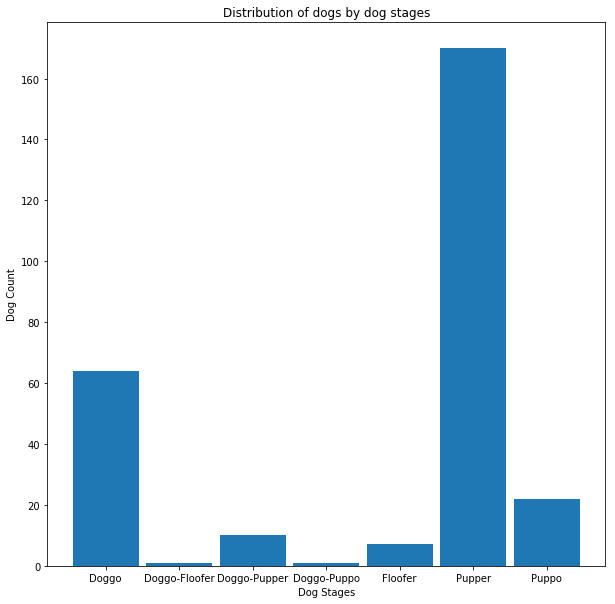

In [465]:
#Lets visulaize above findings
dog_stages = ['Pupper', 'Doggo', 'Puppo','Doggo-Pupper', 'Floofer', 'Doggo-Floofer', 'Doggo-Puppo']
dog_counts = [170, 64, 22, 10, 7, 1, 1 ]

fig,ax = plt.subplots(figsize = (10,10))
ax.bar(dog_stages, dog_counts, width = 0.9)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Dog Stages')
plt.title("Distribution of dogs by dog stages")
plt.show()

#### Fom above results, we can see that Pupper is the most popular amoung other dog stages.

### 2. Ratings by dog stages 

In [466]:
#Find out the ratings by dogs stages
ratings_dog_stage = df_master.groupby('dog_stages', as_index=False)['rating_numerator'].mean()

# Sorting by the most popular
ratings_dog_stage.sort_values(by=['rating_numerator'], inplace=True, ascending=False)
ratings_dog_stage

,dog_stages,rating_numerator
4,"doggo, puppo",13.000000
1,doggo,12.156250
7,puppo,12.136364
5,floofer,12.000000
3,"doggo, pupper",11.800000
0,,11.415689
6,pupper,11.300000
2,"doggo, floofer",11.000000


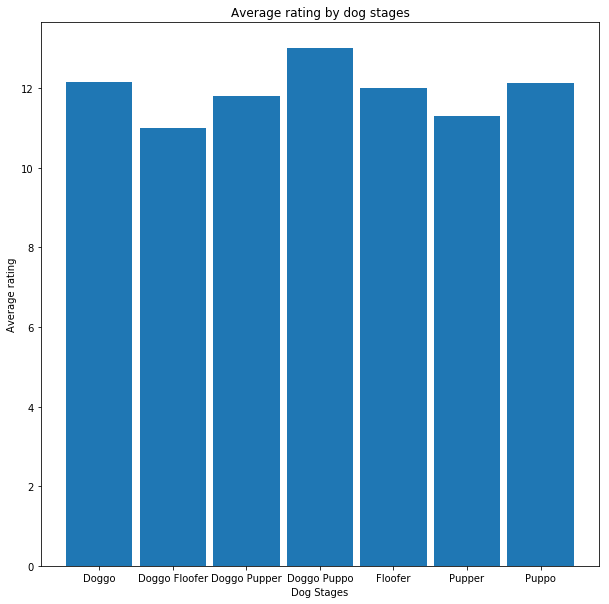

In [473]:
#lets visualize our above findings in bar chart
# Building a bar chart
dog_stages = ['Doggo Puppo', 'Doggo', 'Puppo', 'Floofer', 'Doggo Pupper','Pupper', 'Doggo Floofer']
dog_counts = [13, 12.15, 12.12, 12.00, 11.80, 11.30, 11.00]

fig,ax = plt.subplots(figsize = (10,10))
ax.bar(dog_stages, dog_counts, width = 0.9)
ax.set_ylabel('Average rating')
ax.set_xlabel('Dog Stages')
plt.title("Average rating by dog stages")
plt.show()


#### Looks like the average rating for each dog stages above is 12, and the most popular dog stage by rating is Doggo Puppo that received 13.

### 3 Average number of favorite count for each dog stage

In [476]:
#Find average number of favourite count for each dog stages 
avg_favor_dog_stages = df_master.groupby('dog_stages', as_index=False)['favorite_count'].mean()

# Sorting by most popular
avg_favor_dog_stages.sort_values(by=['favorite_count'], inplace=True, ascending=False)
avg_favor_dog_stages

,dog_stages,favorite_count
4,"doggo, puppo",47844.000000
7,puppo,21433.136364
1,doggo,18740.343750
2,"doggo, floofer",17169.000000
5,floofer,13206.000000
3,"doggo, pupper",10794.900000
0,,9680.259531
6,pupper,7731.823529


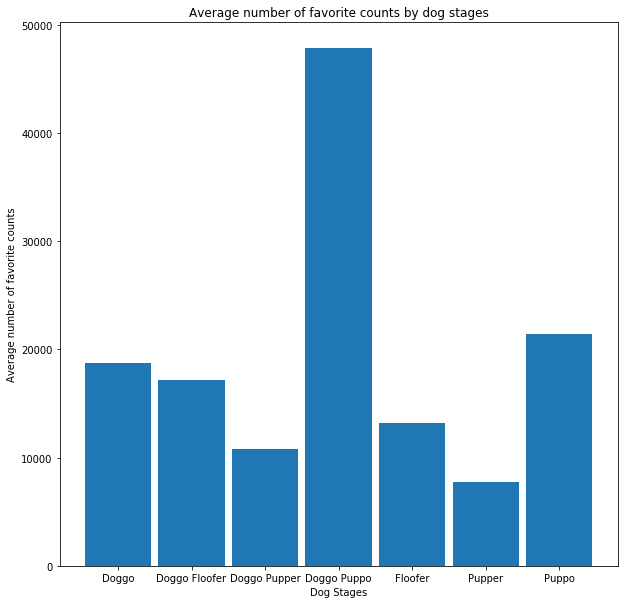

In [479]:
# Building a bar chart
dog_stages = ['Doggo Puppo','Puppo','Doggo', 'Doggo Floofer','Floofer', 'Doggo Pupper','Pupper']
avg_number_fav = [47844, 21433, 18740, 17169, 13206, 10794, 7731]

fig,ax = plt.subplots(figsize = (10,10))
ax.bar(dog_stages, avg_number_fav, width = 0.9)
ax.set_ylabel('Average number of favorite counts')
ax.set_xlabel('Dog Stages')
plt.title("Average number of favorite counts by dog stages")
plt.show()

#### Doggo, Puppo and Puppo are the most favorite dog stages, which have a significant number of favorite counts in comparison with other dog stages.

## Insights

- Fom above results, we can see that Pupper is the most popular amoung other dog stages.
- Looks like the average rating for each dog stages above is 12, and the most popular dog stage by rating is Doggo Puppo that received 13.
- Doggo, Puppo and Puppo are the most favorite dog stages, which have a significant number of favorite counts in comparison with other dog stages.
